In [158]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pypfopt import risk_models, plotting, expected_returns, EfficientFrontier, DiscreteAllocation, EfficientCVaR, CLA, plotting

Preliminiary Project: [Feasible Set of Portfolios](https://github.com/kenrickraymond/Statistical-Models/blob/main/DOW%20Feasible%20Set.ipynb)

In [90]:
tickers_list = ['AXP','AMGN','BA','AAPL','CAT','CVX','CSCO','KO','DIS','DOW','GS','HD','HON','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PG','CRM','TRV','VZ','V','WBA','WMT']

prices = yf.download(tickers_list,'2020-08-10')['Adj Close']
prices.head()

[*********************100%***********************]  27 of 27 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MCD,MRK,MSFT,NKE,PG,TRV,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-10,112.007095,231.625977,100.279861,179.410004,139.032776,197.160004,46.256874,84.917603,128.789993,42.660809,...,199.398819,74.741432,206.252930,104.541901,130.893982,116.192955,195.609070,56.500870,41.125668,129.807831
2020-08-11,108.676010,228.202682,101.898232,180.130005,139.532059,191.990005,45.733547,84.813499,130.490005,42.375134,...,200.258453,74.741432,201.429657,104.254303,130.044769,116.973297,196.583206,56.041119,40.156532,128.154236
2020-08-12,112.287788,235.078445,100.339066,175.440002,139.571228,192.619995,46.615459,85.854507,131.789993,42.165634,...,201.254883,76.376480,207.183945,104.353462,132.221481,115.939331,197.547394,56.127323,40.127750,129.817657
2020-08-13,114.275002,233.853058,99.095680,174.729996,137.711166,195.139999,41.401505,85.002769,130.960007,42.308472,...,201.714005,77.170914,206.698624,105.642761,132.533829,116.339264,196.691238,56.050697,39.340931,130.311829
2020-08-14,114.173164,234.685242,99.085823,178.080002,137.016129,193.460007,41.188293,85.504356,130.529999,42.727459,...,202.241501,77.115486,206.896698,105.553505,131.870071,115.685730,195.755463,56.309307,40.214111,131.053070


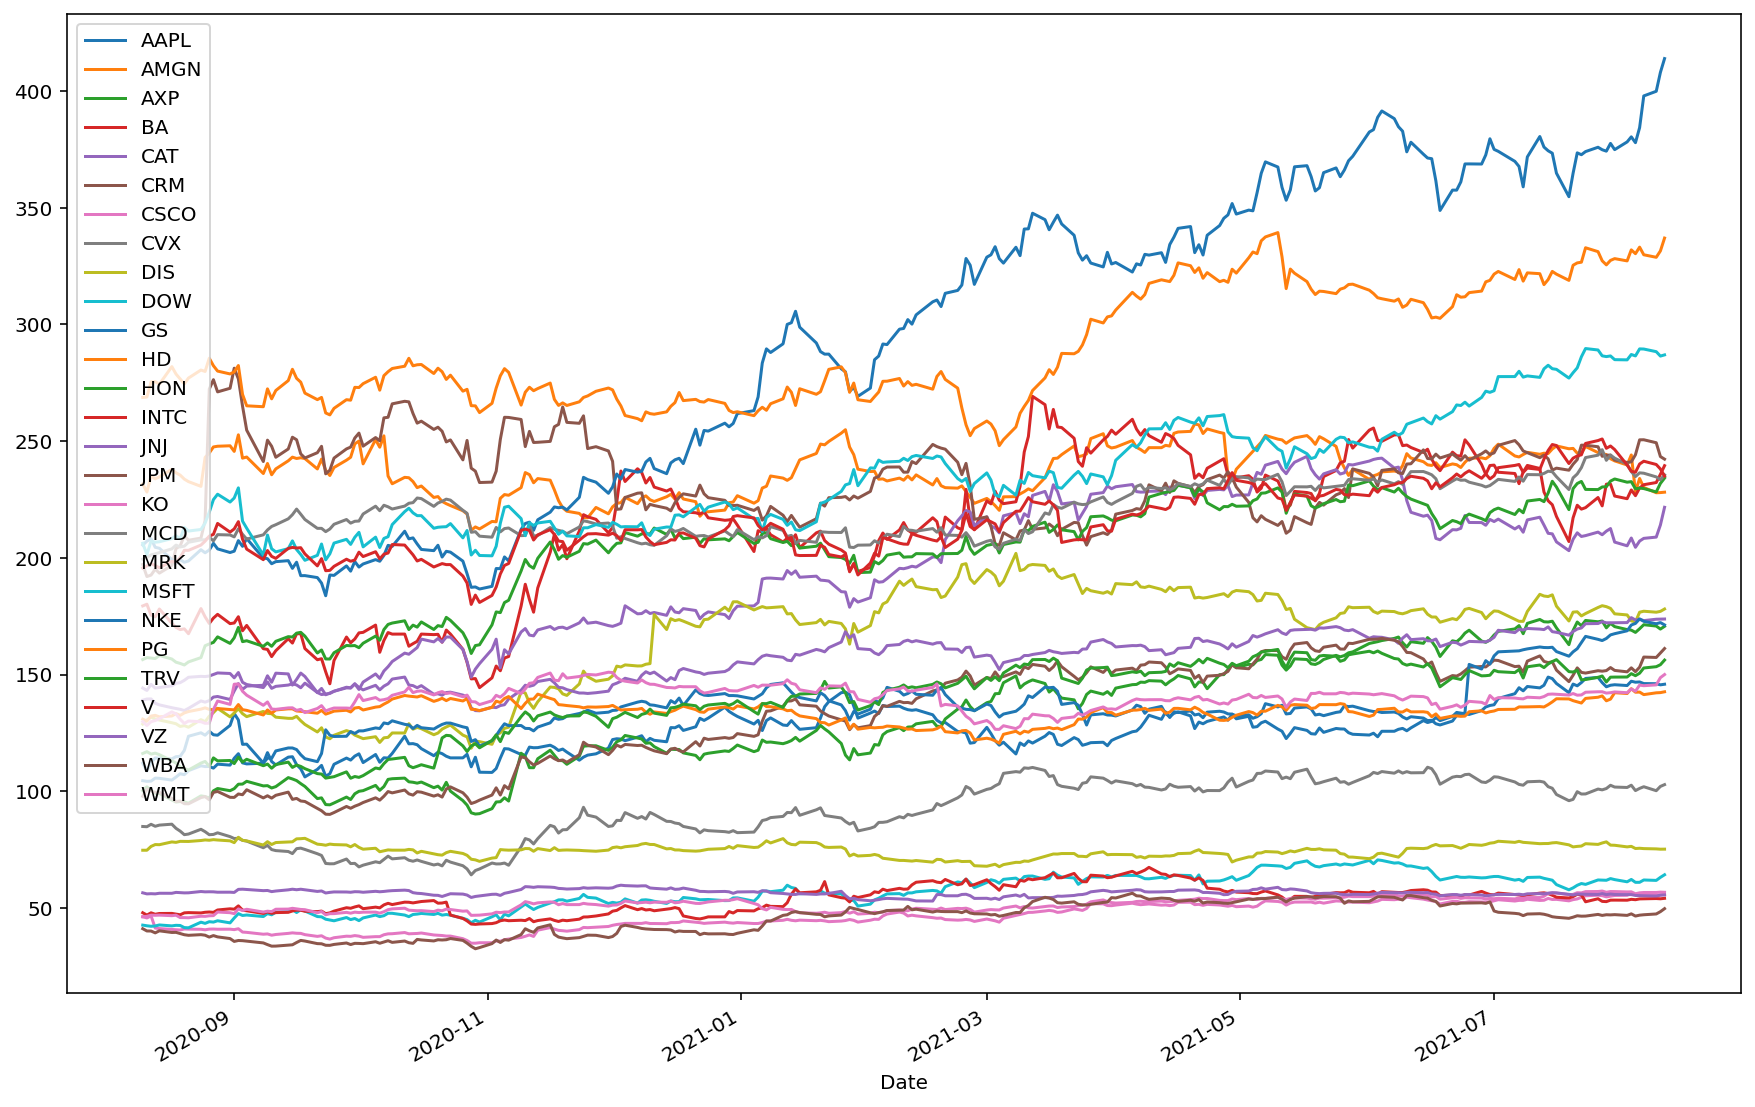

In [91]:
prices[prices.index >= "2020-08-10"].plot(figsize=(15,10));

In [96]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MCD,MRK,MSFT,NKE,PG,TRV,V,VZ,WBA,WMT
AAPL,0.102688,0.024366,0.005171,0.027936,-0.000462,0.052211,0.024155,0.004723,0.006766,0.009643,...,0.015034,0.006427,0.056500,0.020954,0.014200,0.011747,0.027872,0.001814,0.001126,0.022689
AMGN,0.024366,0.057416,0.012305,0.016468,0.011436,0.015967,0.019029,0.015697,0.009927,0.013045,...,0.010733,0.021482,0.024502,0.011329,0.013179,0.013742,0.017653,0.010178,0.020222,0.012698
AXP,0.005171,0.012305,0.121049,0.093110,0.055777,0.006148,0.026978,0.074955,0.063648,0.069213,...,0.009923,0.008628,0.005311,0.015512,-0.001539,0.049914,0.044096,0.016333,0.040713,0.005019
BA,0.027936,0.016468,0.093110,0.180681,0.058920,0.011749,0.033489,0.080509,0.058112,0.076062,...,0.016516,0.008600,0.017883,0.018706,0.000384,0.047807,0.037826,0.014236,0.058913,0.015443
CAT,-0.000462,0.011436,0.055777,0.058920,0.077645,0.000832,0.020002,0.049165,0.036374,0.065897,...,0.011408,0.008387,-0.000658,0.009230,0.006273,0.036939,0.019602,0.013375,0.035017,0.010810


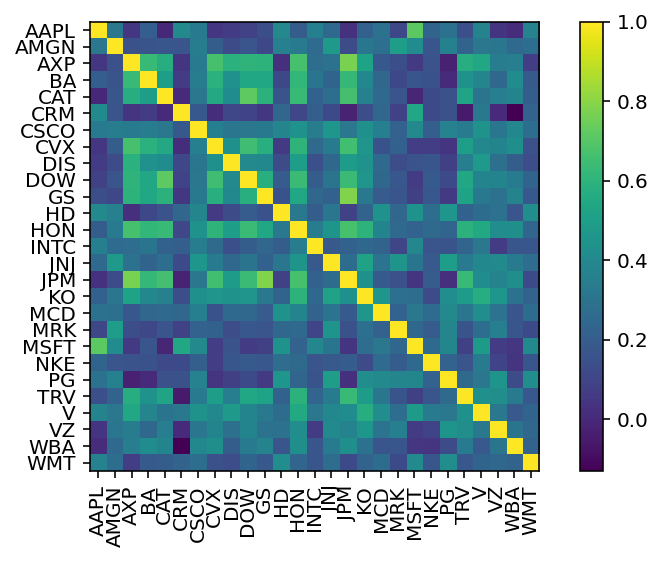

In [97]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

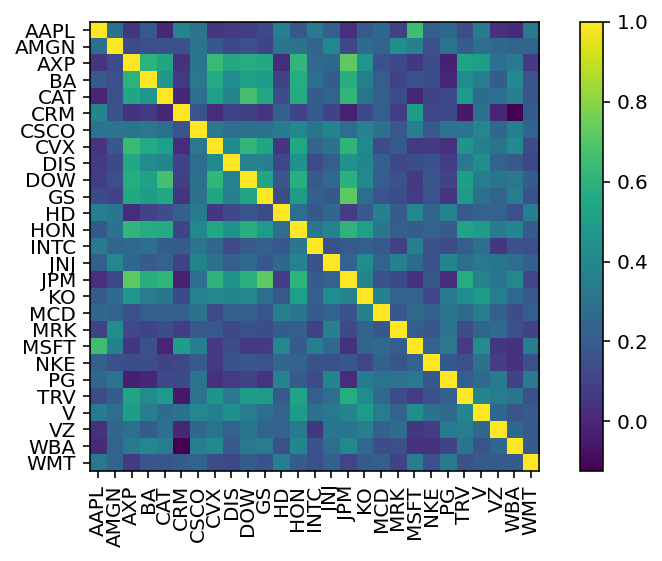

In [98]:
#Ledoit Wolf Shrinkage pulls the most extreme coefficients towards more central values
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [106]:
#calculation of returns using CAPM
mu = expected_returns.capm_return(prices)
mu

AAPL    0.313966
AMGN    0.261727
AXP     0.544304
BA      0.639084
CAT     0.402862
CRM     0.280911
CSCO    0.321818
CVX     0.482807
DIS     0.399358
DOW     0.507639
GS      0.401739
HD      0.216302
HON     0.422592
INTC    0.356593
JNJ     0.210596
JPM     0.442042
KO      0.277292
MCD     0.189795
MRK     0.165319
MSFT    0.273058
NKE     0.239126
PG      0.146260
TRV     0.364665
V       0.362382
VZ      0.165936
WBA     0.366564
WMT     0.193067
Name: mkt, dtype: float64

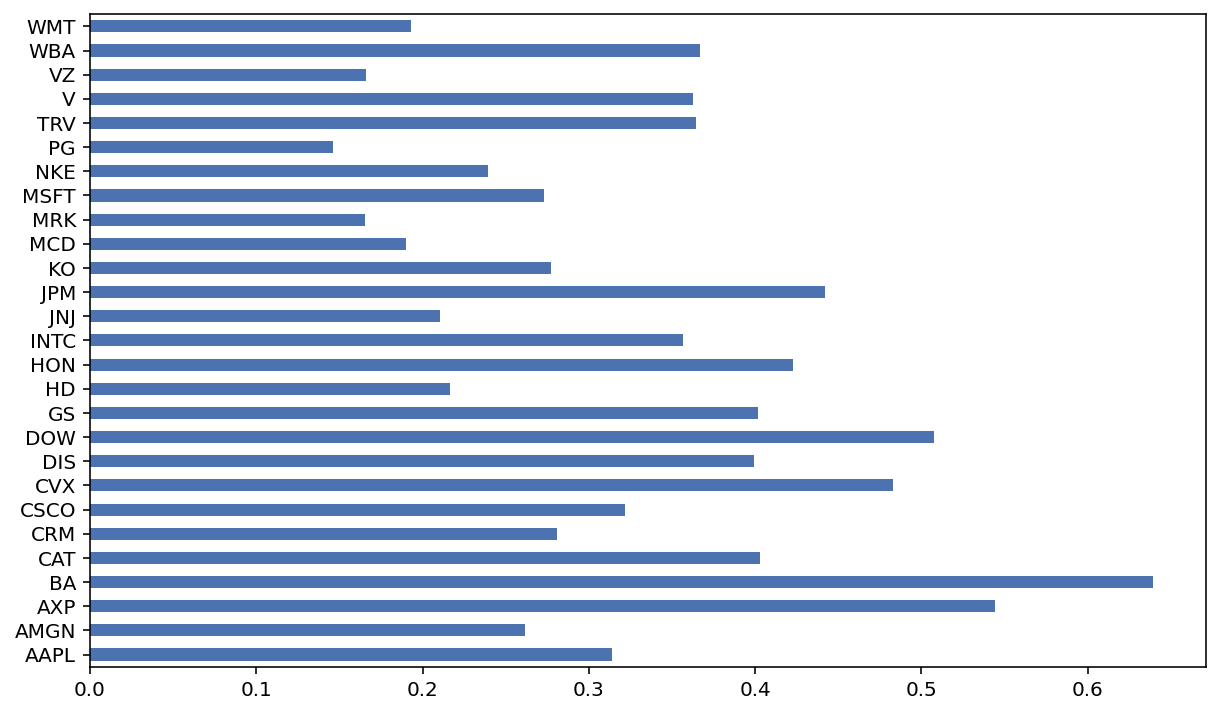

In [102]:
mu.plot.barh(figsize=(10,6));

In [107]:
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', -0.00062),
             ('AMGN', -0.03107),
             ('AXP', 0.00224),
             ('BA', -0.0244),
             ('CAT', 0.02999),
             ('CRM', 0.02424),
             ('CSCO', -0.01205),
             ('CVX', 0.00432),
             ('DIS', 0.01888),
             ('DOW', -0.0538),
             ('GS', 0.04088),
             ('HD', 0.01438),
             ('HON', -0.05481),
             ('INTC', 0.03781),
             ('JNJ', 0.11865),
             ('JPM', 0.04094),
             ('KO', 0.05502),
             ('MCD', 0.16298),
             ('MRK', 0.12609),
             ('MSFT', 0.01562),
             ('NKE', 0.0511),
             ('PG', 0.08966),
             ('TRV', 0.00692),
             ('V', -0.03923),
             ('VZ', 0.25097),
             ('WBA', 0.01068),
             ('WMT', 0.11459)])

In [108]:
ef.portfolio_performance(verbose=True);

Annual volatility: 10.2%


In [130]:
latest_prices = prices.iloc[-1]  # takes the latest trading day prices (price at which we will buy/short stocks)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000, short_ratio=0.3) #Our portfolio is worth $10,000, negative weights indicate a short position (0.30, corresponding to a 130/30 long-short balance) 
alloc, leftover = da.greedy_portfolio(reinvest=False, verbose=False)
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $26.34 leftover


{'VZ': 37,
 'MCD': 6,
 'MRK': 13,
 'JNJ': 5,
 'WMT': 6,
 'PG': 5,
 'KO': 7,
 'NKE': 2,
 'JPM': 2,
 'GS': 1,
 'INTC': 5,
 'CAT': 1,
 'CRM': 1,
 'DIS': 1,
 'MSFT': 1,
 'HD': 1,
 'WBA': 1,
 'HON': -3,
 'DOW': -11,
 'V': -2,
 'AMGN': -2,
 'BA': -2,
 'CSCO': -3}

# Maximize returns for a fixed risk

In [132]:
ef = EfficientFrontier(mu, S)
ef.efficient_risk(target_volatility=0.15)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.04151),
             ('AMGN', 0.04513),
             ('AXP', 0.04117),
             ('BA', 0.04433),
             ('CAT', 0.03787),
             ('CRM', 0.03856),
             ('CSCO', 0.04287),
             ('CVX', 0.04092),
             ('DIS', 0.03919),
             ('DOW', 0.04783),
             ('GS', 0.03658),
             ('HD', 0.03973),
             ('HON', 0.04795),
             ('INTC', 0.03695),
             ('JNJ', 0.02734),
             ('JPM', 0.03657),
             ('KO', 0.0349),
             ('MCD', 0.02207),
             ('MRK', 0.02645),
             ('MSFT', 0.03959),
             ('NKE', 0.03537),
             ('PG', 0.03077),
             ('TRV', 0.04062),
             ('V', 0.0461),
             ('VZ', 0.01164),
             ('WBA', 0.04017),
             ('WMT', 0.02782)])

In [133]:
ef.portfolio_performance(verbose=True);

Expected annual return: 34.9%
Annual volatility: 15.0%
Sharpe Ratio: 2.20


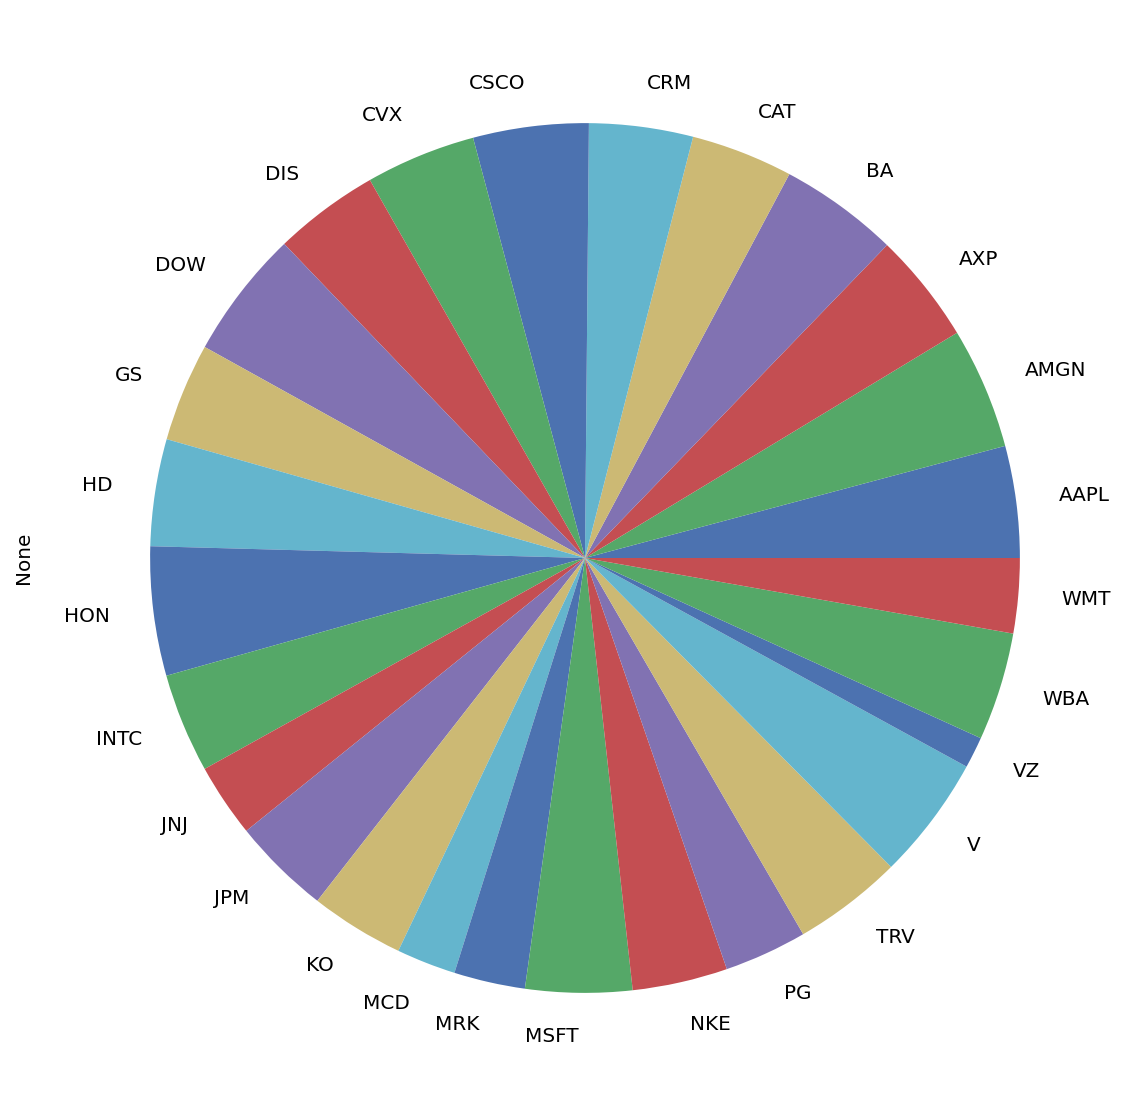

In [135]:
pd.Series(weights).plot.pie(figsize=(10, 10));

# Minimize risk for a fixed return

In [139]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.01743),
             ('AMGN', 0.03153),
             ('AXP', 0.01611),
             ('BA', 0.02844),
             ('CAT', 0.00326),
             ('CRM', 0.00592),
             ('CSCO', 0.02272),
             ('CVX', 0.01515),
             ('DIS', 0.0084),
             ('DOW', 0.04205),
             ('GS', -0.00178),
             ('HD', 0.01049),
             ('HON', 0.04252),
             ('INTC', -0.00036),
             ('JNJ', -0.03778),
             ('JPM', -0.00181),
             ('KO', -0.00833),
             ('MCD', -0.0583),
             ('MRK', -0.04123),
             ('MSFT', 0.00991),
             ('NKE', -0.00651),
             ('PG', -0.02436),
             ('TRV', 0.01394),
             ('V', 0.03531),
             ('VZ', -0.09904),
             ('WBA', 0.0122),
             ('WMT', -0.0359)])

In [141]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 4.5%
Sharpe Ratio: 1.10


# Conditional VaR (Expected Shortfall)

In [144]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MCD,MRK,MSFT,NKE,PG,TRV,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-11,-0.029740,-0.014779,0.016139,0.004013,0.003591,-0.026222,-0.011313,-0.001226,0.013200,-0.006696,...,0.004311,0.000000,-0.023385,-0.002751,-0.006488,0.006716,0.004980,-0.008137,-0.023565,-0.012739
2020-08-12,0.033234,0.030130,-0.015301,-0.026037,0.000281,0.003281,0.019284,0.012274,0.009962,-0.004944,...,0.004976,0.021876,0.028567,0.000951,0.016738,-0.008839,0.004905,0.001538,-0.000717,0.012980
2020-08-13,0.017697,-0.005213,-0.012392,-0.004047,-0.013327,0.013083,-0.111850,-0.009921,-0.006298,0.003388,...,0.002281,0.010402,-0.002342,0.012355,0.002362,0.003450,-0.004334,-0.001365,-0.019608,0.003807
2020-08-14,-0.000891,0.003559,-0.000099,0.019172,-0.005047,-0.008609,-0.005150,0.005901,-0.003284,0.009903,...,0.002615,-0.000718,0.000958,-0.000845,-0.005008,-0.005617,-0.004758,0.004614,0.022195,0.005688
2020-08-17,-0.002611,0.013767,-0.028483,-0.034086,-0.008860,0.016954,-0.009647,0.004649,-0.008887,-0.009137,...,0.007922,0.015333,0.006606,-0.007235,0.002961,-0.022681,0.014188,-0.000170,-0.017418,0.022625


In [146]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 33.5%
Annual volatility: 14.3%
Sharpe Ratio: 2.20


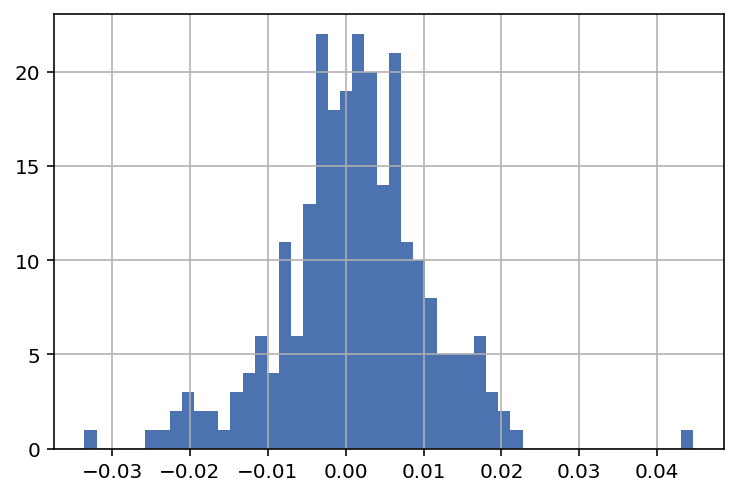

In [148]:
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);

In [150]:
var = portfolio_rets.quantile(0.05) # 95% VaR
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -1.49%
CVaR: -2.10%


This value of the CVaR means that our average loss on the worst 5% of days will be -2.10%. (for a \$10,000 portfolio, this would mean losing \\$210 in a day).

In [157]:
ec = EfficientCVaR(mu, returns)
ec.min_cvar() #Lowest Possible CVaR
ec.portfolio_performance(verbose=True);

Expected annual return: 21.2%
Conditional Value at Risk: 1.42%


In [159]:
ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.025) #best tradeoff of risk and returns
ec.portfolio_performance(verbose=True);

Expected annual return: 46.9%
Conditional Value at Risk: 2.50%


# Plotting the Efficient Frontier

In [161]:
cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 31.8%
Annual volatility: 13.6%
Sharpe Ratio: 2.19


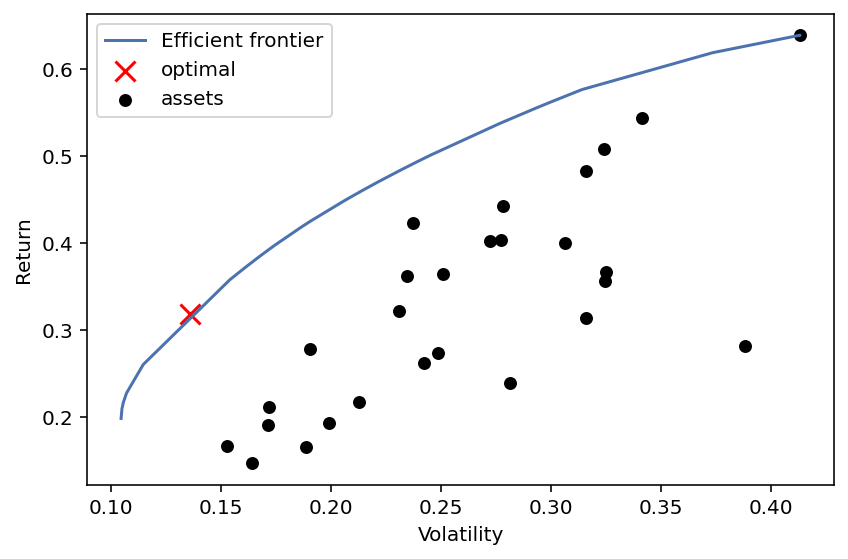

In [165]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [173]:
# A more efficient way of generating samples compared to a for loop
n_samples = 1000000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.3341117  0.33502768 0.35184293 ... 0.29302428 0.32605944 0.33800098]
Sample portfolio volatilities: 0         0.146023
1         0.148055
2         0.155998
3         0.160049
4         0.140823
            ...   
999995    0.139441
999996    0.134800
999997    0.128707
999998    0.146844
999999    0.148320
Length: 1000000, dtype: float64


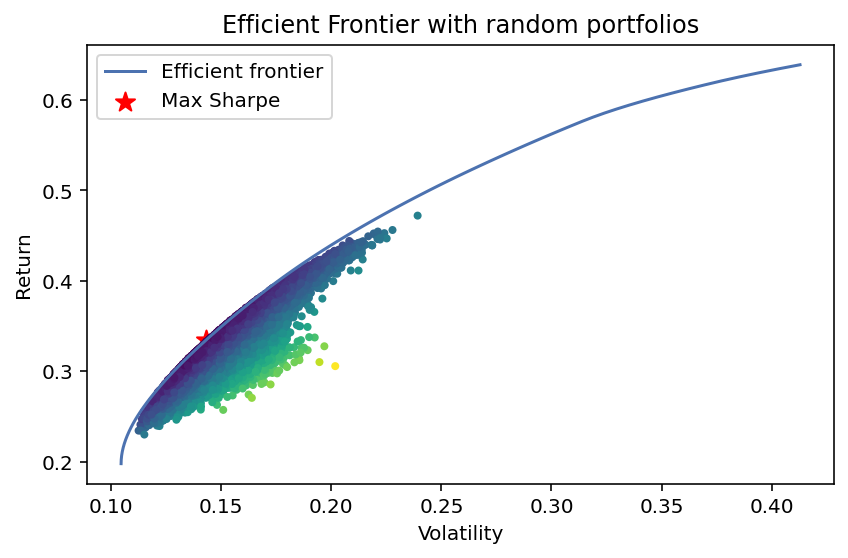

In [174]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()